In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

plt.style.use('ggplot')
rcParams['figure.figsize'] = [12,9]


In [4]:
dt = pd.read_csv('../input/tabular-playground-series-jul-2021/train.csv', parse_dates=['date_time'], index_col='date_time')

In [5]:
dt.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


<AxesSubplot:xlabel='date_time'>

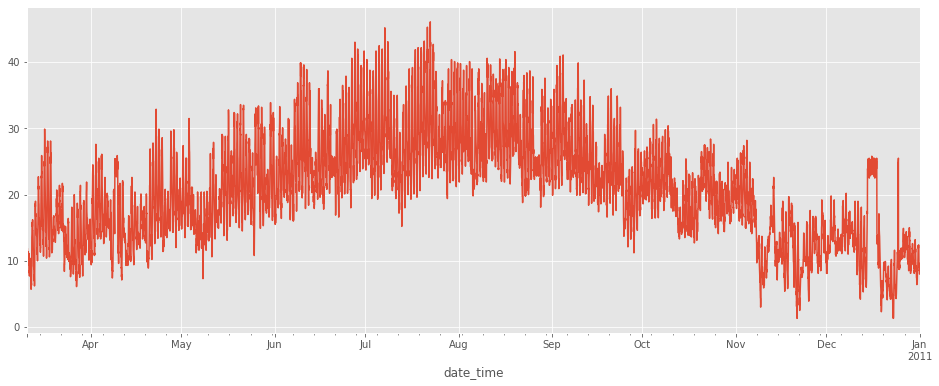

In [6]:
dt['deg_C'].plot(figsize=(16,6))


In [7]:
meat = pd.read_csv( "https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv", parse_dates=["date"], index_col="date")
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

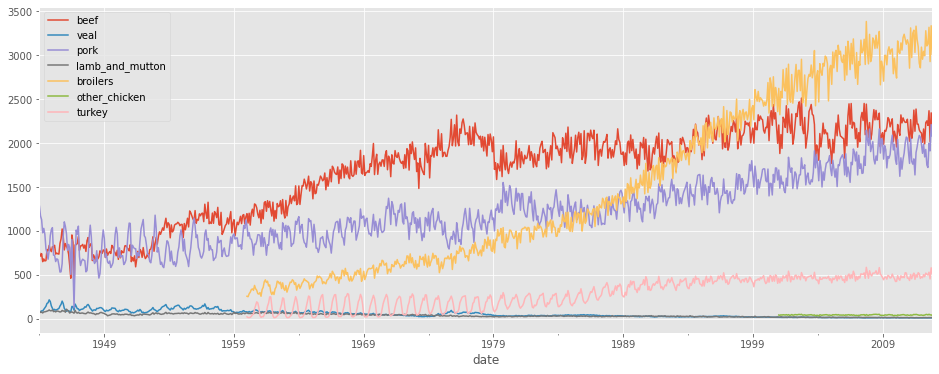

In [8]:
meat.plot(figsize=(16,6))

<AxesSubplot:xlabel='date'>

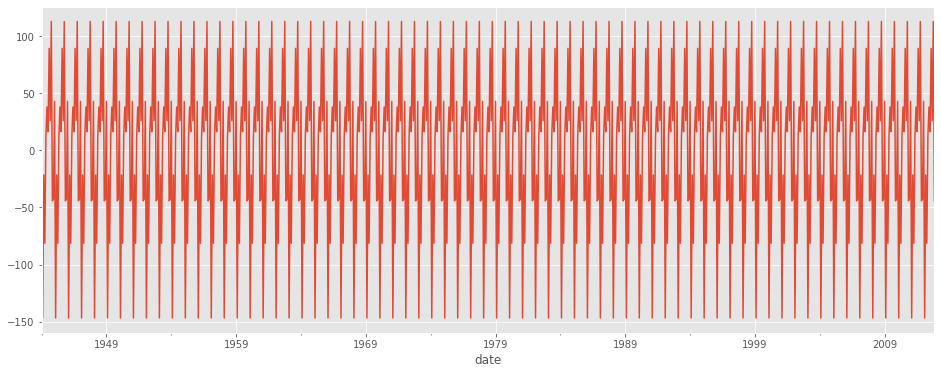

In [9]:
import statsmodels.api as sm 
decomposition = sm.tsa.seasonal_decompose(meat['beef'])
decomposition.seasonal.plot(figsize=(16,6))

<AxesSubplot:xlabel='date'>

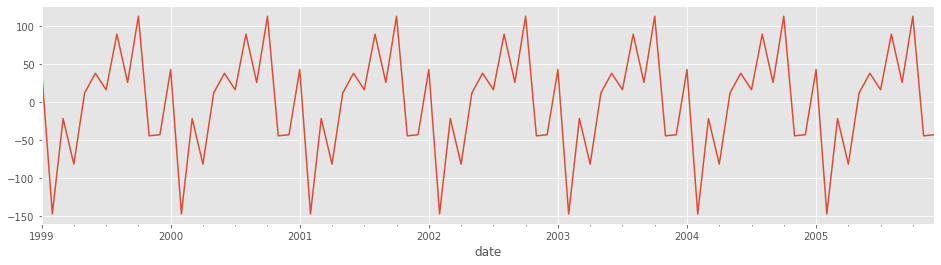

In [10]:
decomposition.seasonal['1999':'2005'].plot(figsize=(16,4))

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

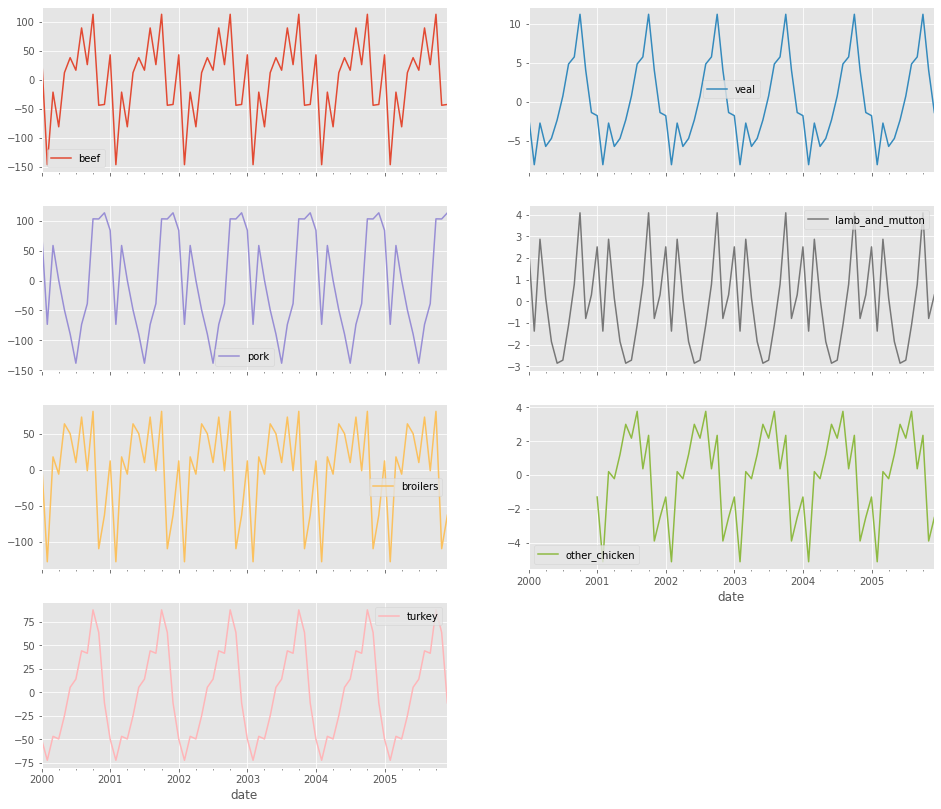

In [11]:
seasonality_dict = {}

for ts in meat.columns:
    decompositions = sm.tsa.seasonal_decompose(meat[ts].dropna())
    seasonality_dict[ts] = decompositions.seasonal

pd.DataFrame(seasonality_dict)["2000":"2005"].plot(subplots=True, layout=(4,2), figsize=(16,14))

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

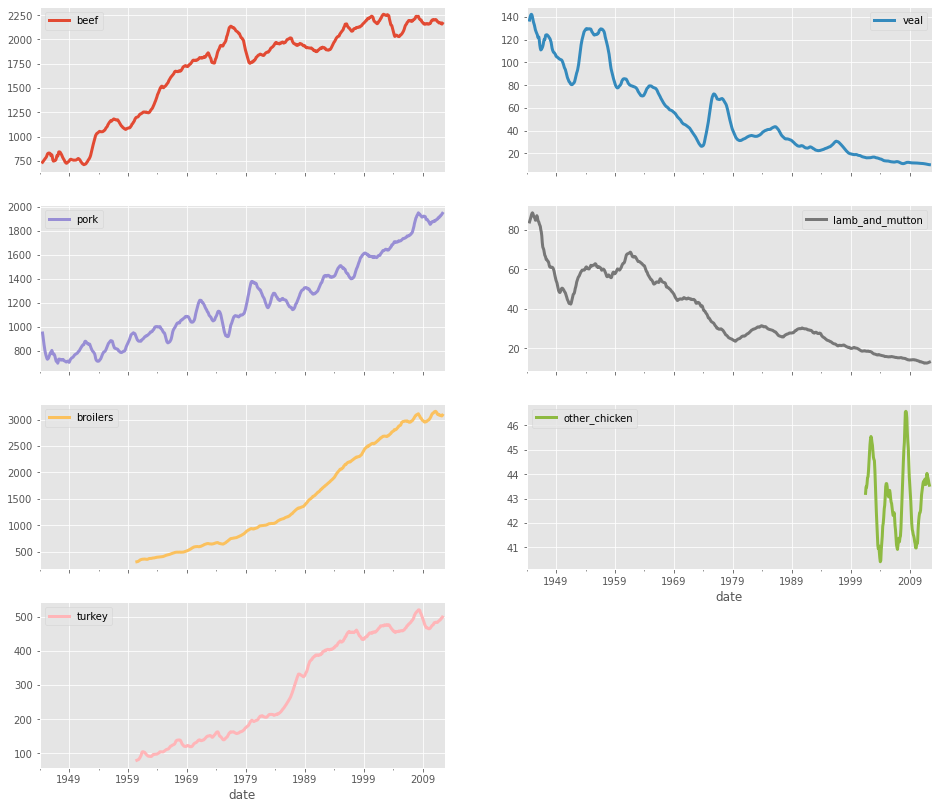

In [12]:
trend_dict = {}

for ts in meat.columns:
    decompositions = sm.tsa.seasonal_decompose(meat[ts].dropna())
    trend_dict[ts] = decompositions.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4,2), figsize=(16,14), linewidth=3)

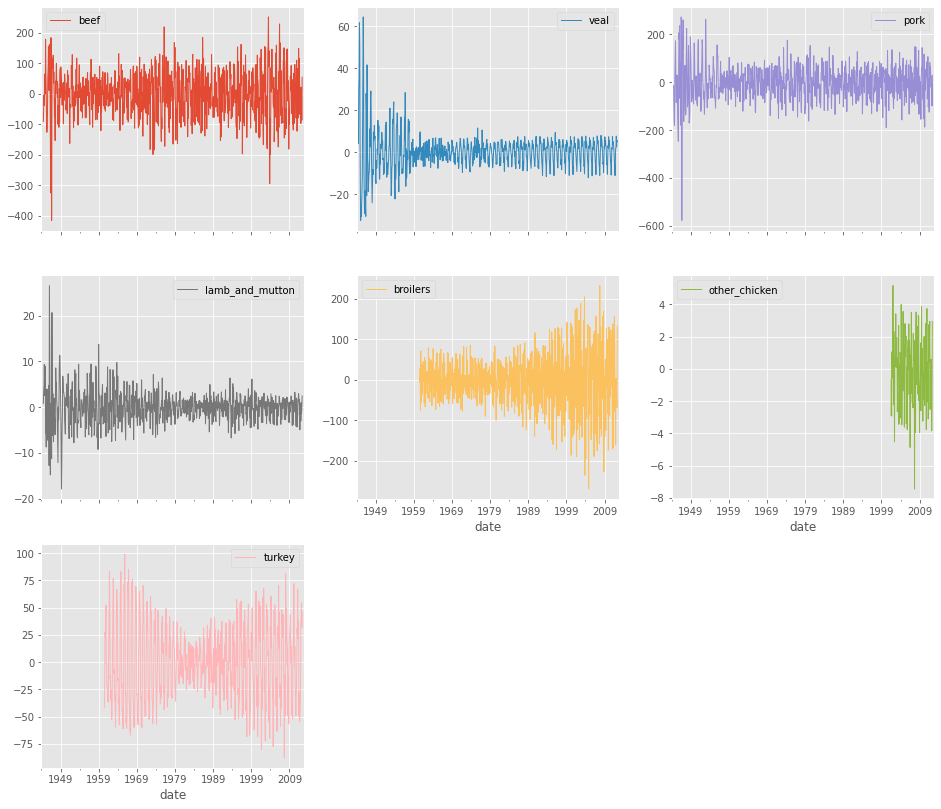

In [13]:
resid_dict = {}

for ts in meat.columns:
    decomposition = sm.tsa.seasonal_decompose(meat[ts].dropna())
    resid_dict[ts] = decomposition.resid

pd.DataFrame(resid_dict).plot(figsize= (16,14),subplots=True, layout=(3, 3), linewidth=1);

### Multiple time series

<AxesSubplot:xlabel='date'>

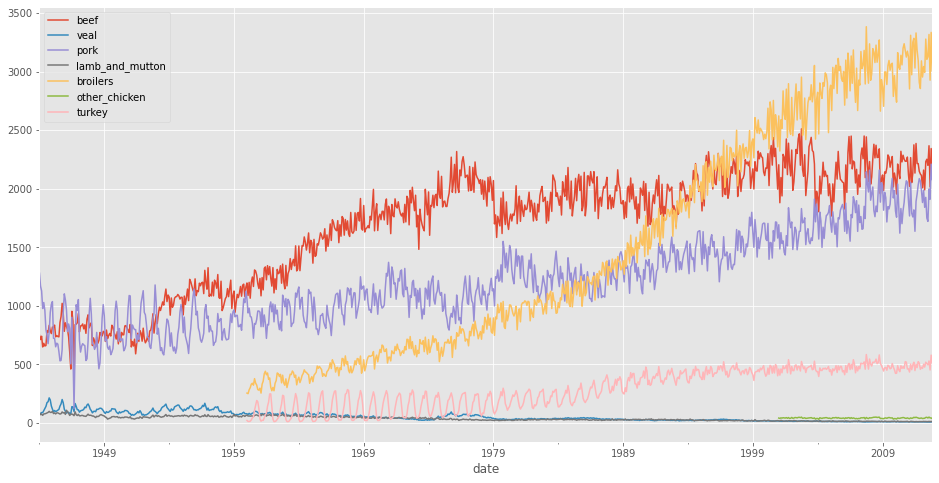

In [14]:
meat.plot(figsize=(16,8))

In [15]:
meat.div(meat.iloc[0]).head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
1944-02-01,0.949401,0.905882,0.913281,0.808989,NaN,NaN,NaN
1944-03-01,0.986684,1.058824,0.881250,0.842697,NaN,NaN,NaN
1944-04-01,0.865513,1.047059,0.764062,0.741573,NaN,NaN,NaN
1944-05-01,0.906791,1.247059,0.803906,0.876404,NaN,NaN,NaN


In [16]:
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

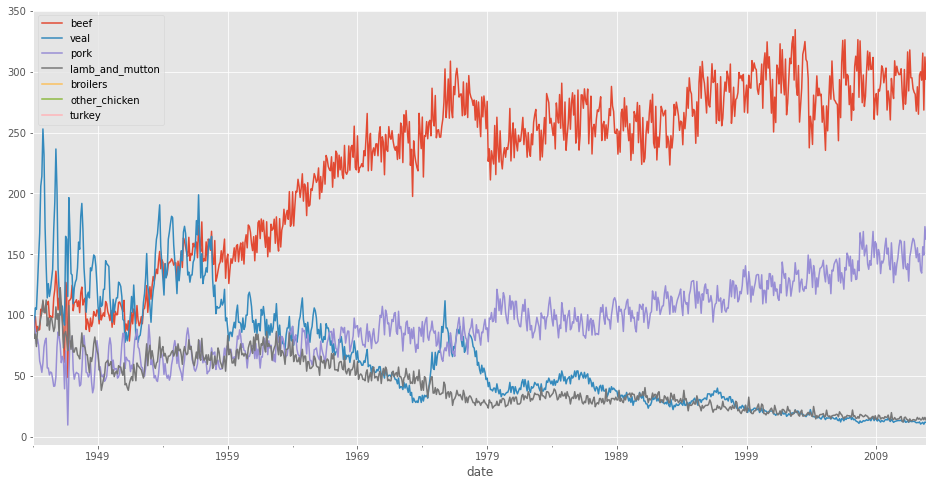

In [17]:
normalized = meat.div(meat.iloc[0]).mul(100)

normalized.plot(figsize=(16,8))

<AxesSubplot:>

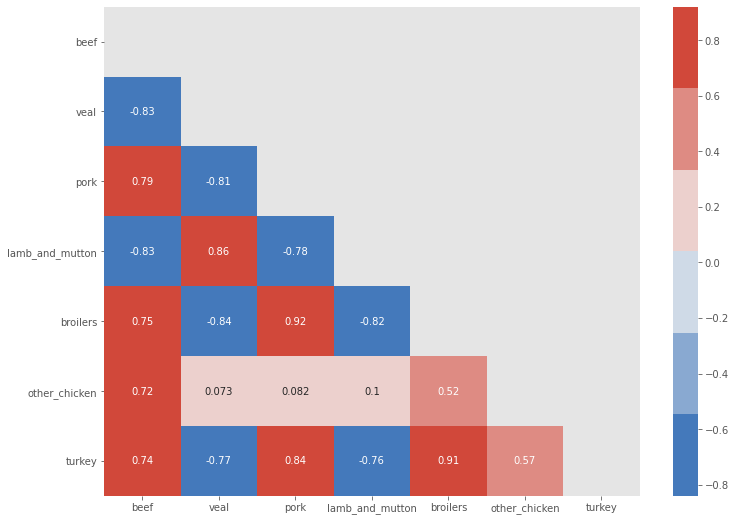

In [21]:
cmap = sns.diverging_palette(250, 15)

matrix = meat.corr(method='pearson')
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, cmap=cmap, annot=True)

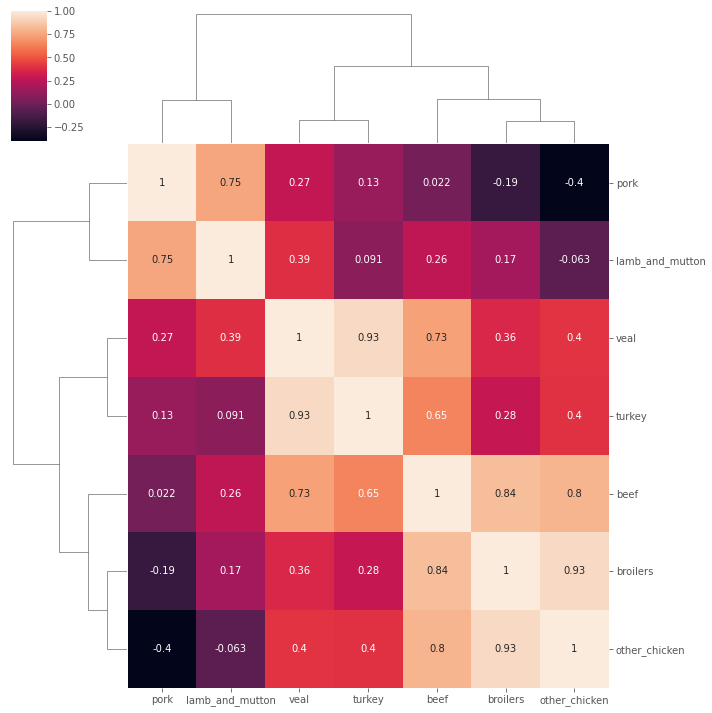

In [26]:
seasonality_dict={ts: sm.tsa.seasonal_decompose(meat[ts].dropna()).seasonal for ts in meat.columns}
seasonality_corr = pd.DataFrame(seasonality_dict).corr()
sns.clustermap(seasonality_corr, annot=True, square=True)